# Historical Financial Ratios

### 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy_ext import rolling_apply

### 2. Data processing

#### 2.1. Reading data from CSV

In [2]:
SHILLER_DATA_PATH = "../../data/raw/shiller.csv"
PDE_COLS = [ "date", "cpi", "price", "dividends", "earnings" ]

In [3]:
shiller_df = pd.read_csv(SHILLER_DATA_PATH)
shiller_df

,date,price,dividends,earnings,cpi,long_term_interest_rate
0,1871-01,4.44,0.26000,0.40,12.464,5.32
1,1871-02,4.50,0.26000,0.40,12.845,5.32
2,1871-03,4.61,0.26000,0.40,13.035,5.33
3,1871-04,4.74,0.26000,0.40,12.559,5.33
4,1871-05,4.86,0.26000,0.40,12.274,5.33
...,...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,310.326,4.21
1838,2024-03,5170.57,70.82483,191.39,312.332,4.21
1839,2024-04,5112.49,71.20848,193.18,313.548,4.54
1840,2024-05,5235.23,71.59214,194.97,314.069,4.48


#### 2.2. Keeping only the relevant information

In [4]:
pde_df = shiller_df[PDE_COLS]
pde_df

,date,cpi,price,dividends,earnings
0,1871-01,12.464,4.44,0.26000,0.40
1,1871-02,12.845,4.50,0.26000,0.40
2,1871-03,13.035,4.61,0.26000,0.40
3,1871-04,12.559,4.74,0.26000,0.40
4,1871-05,12.274,4.86,0.26000,0.40
...,...,...,...,...,...
1837,2024-02,310.326,5011.96,70.65111,191.74
1838,2024-03,312.332,5170.57,70.82483,191.39
1839,2024-04,313.548,5112.49,71.20848,193.18
1840,2024-05,314.069,5235.23,71.59214,194.97


### 3. Appending simple ratio columns

In [5]:
DATE_COL = "date"
CPI_COL = "cpi"
PRICE_COL = "price"
DIVIDENDS_COL = "dividends"
EARNINGS_COL = "earnings"

PE_COL = "price_to_earnings"
EY_COL = "earnings_yield"
PD_COL = "price_to_dividends"
DY_COL = "dividends_yield"
DC_COL = "dividend_cover"
DP_COL = "dividend_payout"

In [6]:
ratios_df = pde_df.copy()

#### 3.1. Price-to-earnings ratio

In [7]:
ratios_df[PE_COL] = ratios_df[PRICE_COL] / ratios_df[EARNINGS_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, PE_COL]]

,date,price,dividends,earnings,price_to_earnings
0,1871-01,4.44,0.26000,0.40,11.100000
1,1871-02,4.50,0.26000,0.40,11.250000
2,1871-03,4.61,0.26000,0.40,11.525000
3,1871-04,4.74,0.26000,0.40,11.850000
4,1871-05,4.86,0.26000,0.40,12.150000
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,26.139355
1838,2024-03,5170.57,70.82483,191.39,27.015884
1839,2024-04,5112.49,71.20848,193.18,26.464903
1840,2024-05,5235.23,71.59214,194.97,26.851464


#### 3.2. Earnings yield

In [8]:
ratios_df[EY_COL] = 1.0 / ratios_df[PE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, EY_COL]]

,date,price,dividends,earnings,earnings_yield
0,1871-01,4.44,0.26000,0.40,0.090090
1,1871-02,4.50,0.26000,0.40,0.088889
2,1871-03,4.61,0.26000,0.40,0.086768
3,1871-04,4.74,0.26000,0.40,0.084388
4,1871-05,4.86,0.26000,0.40,0.082305
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.038256
1838,2024-03,5170.57,70.82483,191.39,0.037015
1839,2024-04,5112.49,71.20848,193.18,0.037786
1840,2024-05,5235.23,71.59214,194.97,0.037242


#### 3.3. Price-to-dividends ratio

In [9]:
ratios_df[PD_COL] = ratios_df[PRICE_COL] / ratios_df[DIVIDENDS_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, PD_COL]]

,date,price,dividends,earnings,price_to_dividends
0,1871-01,4.44,0.26000,0.40,17.076923
1,1871-02,4.50,0.26000,0.40,17.307692
2,1871-03,4.61,0.26000,0.40,17.730769
3,1871-04,4.74,0.26000,0.40,18.230769
4,1871-05,4.86,0.26000,0.40,18.692308
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,70.939579
1838,2024-03,5170.57,70.82483,191.39,73.005046
1839,2024-04,5112.49,71.20848,193.18,71.796084
1840,2024-05,5235.23,71.59214,194.97,73.125765


#### 3.4. Dividends yield

In [10]:
ratios_df[DY_COL] = 1.0 / ratios_df[PD_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DY_COL]]

,date,price,dividends,earnings,dividends_yield
0,1871-01,4.44,0.26000,0.40,0.058559
1,1871-02,4.50,0.26000,0.40,0.057778
2,1871-03,4.61,0.26000,0.40,0.056399
3,1871-04,4.74,0.26000,0.40,0.054852
4,1871-05,4.86,0.26000,0.40,0.053498
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.014097
1838,2024-03,5170.57,70.82483,191.39,0.013698
1839,2024-04,5112.49,71.20848,193.18,0.013928
1840,2024-05,5235.23,71.59214,194.97,0.013675


#### 3.5. Dividend cover

In [11]:
ratios_df[DC_COL] = ratios_df[EY_COL] * ratios_df[PD_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DC_COL]]

,date,price,dividends,earnings,dividend_cover
0,1871-01,4.44,0.26000,0.40,1.538462
1,1871-02,4.50,0.26000,0.40,1.538462
2,1871-03,4.61,0.26000,0.40,1.538462
3,1871-04,4.74,0.26000,0.40,1.538462
4,1871-05,4.86,0.26000,0.40,1.538462
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,2.713899
1838,2024-03,5170.57,70.82483,191.39,2.702301
1839,2024-04,5112.49,71.20848,193.18,2.712879
1840,2024-05,5235.23,71.59214,194.97,2.723344


#### 3.6. Dividend payout ratio

In [12]:
ratios_df[DP_COL] = ratios_df[DY_COL] * ratios_df[PE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DP_COL]]

,date,price,dividends,earnings,dividend_payout
0,1871-01,4.44,0.26000,0.40,0.650000
1,1871-02,4.50,0.26000,0.40,0.650000
2,1871-03,4.61,0.26000,0.40,0.650000
3,1871-04,4.74,0.26000,0.40,0.650000
4,1871-05,4.86,0.26000,0.40,0.650000
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.368474
1838,2024-03,5170.57,70.82483,191.39,0.370055
1839,2024-04,5112.49,71.20848,193.18,0.368612
1840,2024-05,5235.23,71.59214,194.97,0.367196


### 4. Appending more complex ratio columns

In [13]:
H_CAPE_COL = "half_cyclically_adjusted_price_to_earnings"
H_CAEY_COL = "half_cyclically_adjusted_earnings_yield"
CAPE_COL = "cyclically_adjusted_price_to_earnings"
CAEY_COL = "cyclically_adjusted_earnings_yield"

In [14]:
REAL_PRICE_COL = "real_price"
REAL_EARNINGS_COL = "real_earnings"
AVG_REAL_EARNINGS_COL = "avg_real_earnings"

In [15]:
def cape(df, periods):
  cape_df = df.copy()

  curr_cpi = cape_df.iloc[-1][CPI_COL]
  cape_df[REAL_PRICE_COL] = cape_df[PRICE_COL] * (curr_cpi / cape_df[CPI_COL])
  cape_df[REAL_EARNINGS_COL] = cape_df[EARNINGS_COL] * (curr_cpi / cape_df[CPI_COL])

  cape_df[AVG_REAL_EARNINGS_COL] = rolling_apply(np.mean, periods, cape_df[REAL_EARNINGS_COL])

  return cape_df[REAL_PRICE_COL] / cape_df[AVG_REAL_EARNINGS_COL]

#### 4.1. 5-year cyclically-adjusted-price-to-earnings ratio

In [16]:
ratios_df[H_CAPE_COL] = cape(ratios_df, 60)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, H_CAPE_COL]]

,date,price,dividends,earnings,half_cyclically_adjusted_price_to_earnings
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,29.136734
1838,2024-03,5170.57,70.82483,191.39,29.790412
1839,2024-04,5112.49,71.20848,193.18,29.263360
1840,2024-05,5235.23,71.59214,194.97,29.832579


#### 4.2. 5-year cyclically-adjusted-earnings-yield

In [17]:
ratios_df[H_CAEY_COL] = 1.0 / ratios_df[H_CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, H_CAEY_COL]]

,date,price,dividends,earnings,half_cyclically_adjusted_earnings_yield
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.034321
1838,2024-03,5170.57,70.82483,191.39,0.033568
1839,2024-04,5112.49,71.20848,193.18,0.034172
1840,2024-05,5235.23,71.59214,194.97,0.033520


#### 4.3. 10-year cyclically-adjusted-price-to-earnings ratio (Shiller CAPE)

In [18]:
ratios_df[CAPE_COL] = cape(ratios_df, 120)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, CAPE_COL]]

,date,price,dividends,earnings,cyclically_adjusted_price_to_earnings
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,32.930958
1838,2024-03,5170.57,70.82483,191.39,33.648573
1839,2024-04,5112.49,71.20848,193.18,33.036651
1840,2024-05,5235.23,71.59214,194.97,33.665375


#### 4.4. 10-year cyclically-adjusted-earnings-yield (Shiller CAEY)

In [19]:
ratios_df[CAEY_COL] = 1.0 / ratios_df[CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, CAEY_COL]]

,date,price,dividends,earnings,cyclically_adjusted_earnings_yield
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.030367
1838,2024-03,5170.57,70.82483,191.39,0.029719
1839,2024-04,5112.49,71.20848,193.18,0.030269
1840,2024-05,5235.23,71.59214,194.97,0.029704


### 5. Appending some variants of the ratios

In [20]:
P_CAPE_COL = "p_cape"
P_CAEY_COL = "p_caey"

In [21]:
def avg_real_earnings(dividend_payout_ratio, real_earnings, caey):
  num_periods = caey.size
  freq = 12.0
  num_yields = (num_periods - np.arange(num_periods) - 1) / freq

  # a = p * (1 + r/n)^nt
  #   with
  #     n = 12, t = 120/12 = 10
  adjusted_real_earnings = dividend_payout_ratio * real_earnings + \
    (1 - dividend_payout_ratio) * real_earnings * np.power((1.0 + caey/freq), freq*num_yields)

  return np.mean(adjusted_real_earnings)


def p_cape(df, periods):
  p_cape_df = df.copy()

  curr_cpi = p_cape_df.iloc[-1][CPI_COL]
  p_cape_df[REAL_PRICE_COL] = p_cape_df[PRICE_COL] * (curr_cpi / p_cape_df[CPI_COL])
  p_cape_df[REAL_EARNINGS_COL] = p_cape_df[EARNINGS_COL] * (curr_cpi / p_cape_df[CPI_COL])
  
  p_cape_df[AVG_REAL_EARNINGS_COL] = \
    rolling_apply(
      avg_real_earnings,
      periods,
      p_cape_df[DP_COL],
      p_cape_df[REAL_EARNINGS_COL],
      p_cape_df[CAEY_COL],
    )

  return p_cape_df[REAL_PRICE_COL] / p_cape_df[AVG_REAL_EARNINGS_COL]

#### 5.1. 10-year payout-adjusted cyclically-adjusted-price-to-earnings ratio

In [22]:
ratios_df[P_CAPE_COL] = p_cape(ratios_df, 120)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, P_CAPE_COL]]

,date,price,dividends,earnings,p_cape
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,29.879389
1838,2024-03,5170.57,70.82483,191.39,30.549188
1839,2024-04,5112.49,71.20848,193.18,30.012656
1840,2024-05,5235.23,71.59214,194.97,30.602935


#### 5.2. 10-year payout-adjusted cyclically-adjusted-earnings-yield

In [23]:
ratios_df[P_CAEY_COL] = 1.0 / ratios_df[P_CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, P_CAEY_COL]]

,date,price,dividends,earnings,p_caey
0,1871-01,4.44,0.26000,0.40,NaN
1,1871-02,4.50,0.26000,0.40,NaN
2,1871-03,4.61,0.26000,0.40,NaN
3,1871-04,4.74,0.26000,0.40,NaN
4,1871-05,4.86,0.26000,0.40,NaN
...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,0.033468
1838,2024-03,5170.57,70.82483,191.39,0.032734
1839,2024-04,5112.49,71.20848,193.18,0.033319
1840,2024-05,5235.23,71.59214,194.97,0.032677


### 6. Simplifying dataset and saving results

In [24]:
COL_MAP = {
  DATE_COL: "date",
  H_CAPE_COL: "half_cape",
  H_CAEY_COL: "half_caey",
  CAPE_COL: "cape",
  CAEY_COL: "caey",
  P_CAPE_COL: "p-cape",
  P_CAEY_COL: "p-caey",
}

In [25]:
capes_df = \
  ratios_df[[DATE_COL, H_CAPE_COL, H_CAEY_COL, CAPE_COL, CAEY_COL, P_CAPE_COL, P_CAEY_COL]]

#### 6.1. Rename columns to simplified versions of themselves

In [26]:
capes_df = capes_df.rename(columns=COL_MAP)

#### 6.2. Save simplified results as derived dataset

In [27]:
CAPES_DATA_PATH = "../../data/derived/capes.csv"

In [28]:
capes_df.drop(columns=["half_cape", "half_caey"]).to_csv(CAPES_DATA_PATH)

### 7. Analysis of results

#### 7.1. Traditional financial ratios analysis

##### 7.1.1. Price-to-earnings ratio

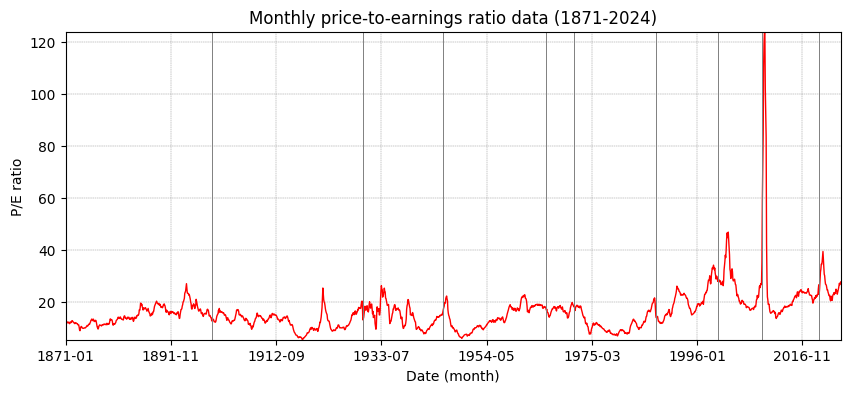

In [29]:
ratios_df.plot(x=DATE_COL, y=PE_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price-to-earnings ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.2. Earnings yield

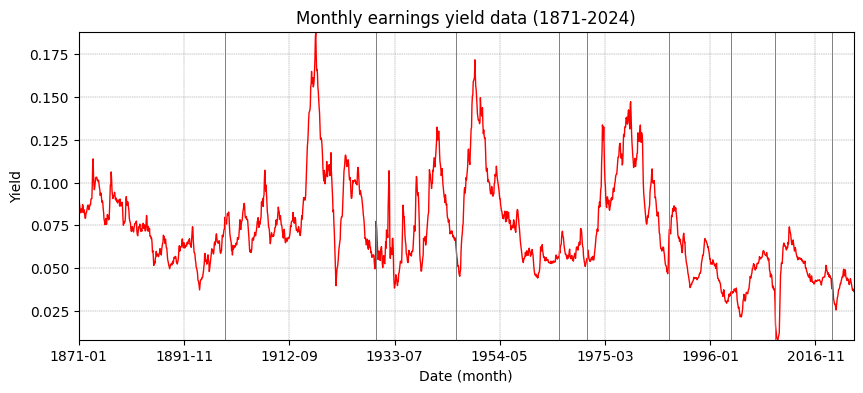

In [30]:
ratios_df.plot(x=DATE_COL, y=EY_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly earnings yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.3. Price-to-dividends ratio

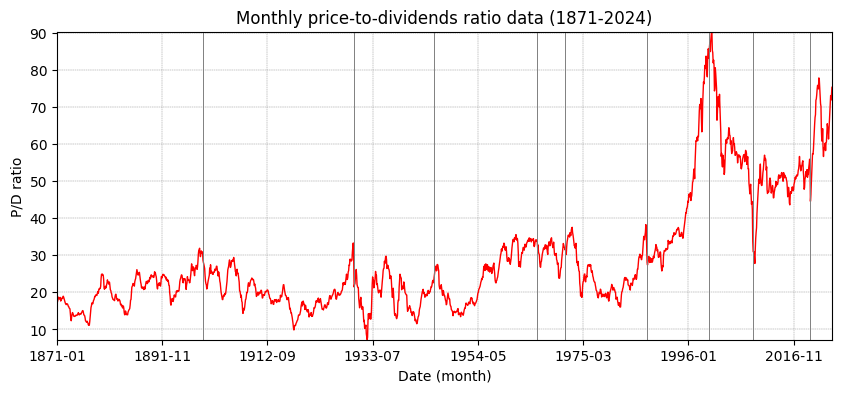

In [31]:
ratios_df.plot(x=DATE_COL, y=PD_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price-to-dividends ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/D ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.4. Dividends yield

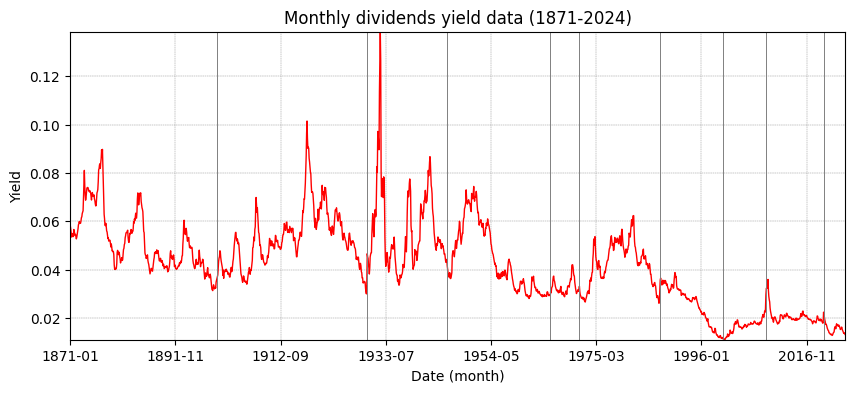

In [32]:
ratios_df.plot(x=DATE_COL, y=DY_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividends yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.5. Dividend cover

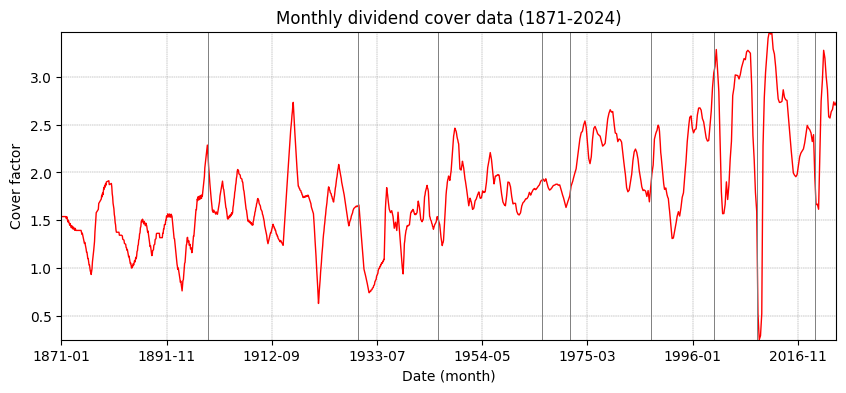

In [33]:
ratios_df.plot(x=DATE_COL, y=DC_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividend cover data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Cover factor")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.6. Dividend payout ratio

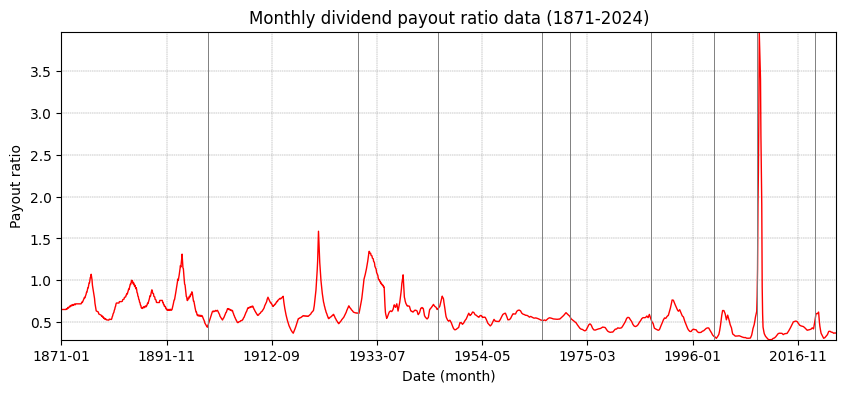

In [34]:
ratios_df.plot(x=DATE_COL, y=DP_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividend payout ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 7.2. Newer financial ratios analysis

##### 7.2.1. Half-cyclically-adjusted-price-to-earnings ratio

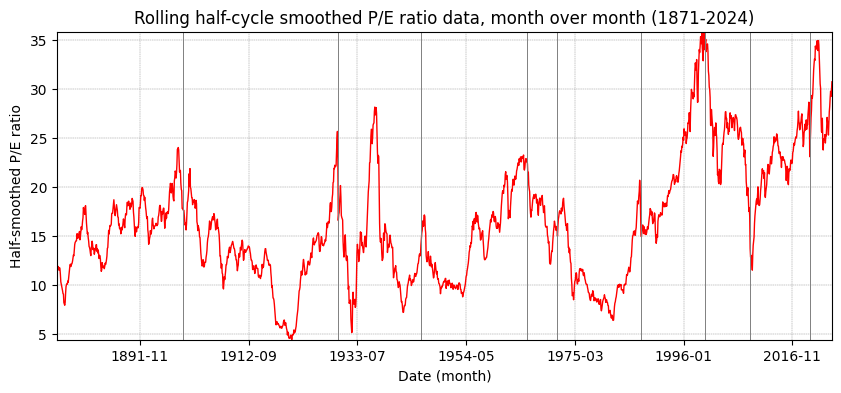

In [35]:
capes_df.plot(x="date", y="half_cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling half-cycle smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Half-smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.2. Half-cyclically-adjusted-earnings-yield

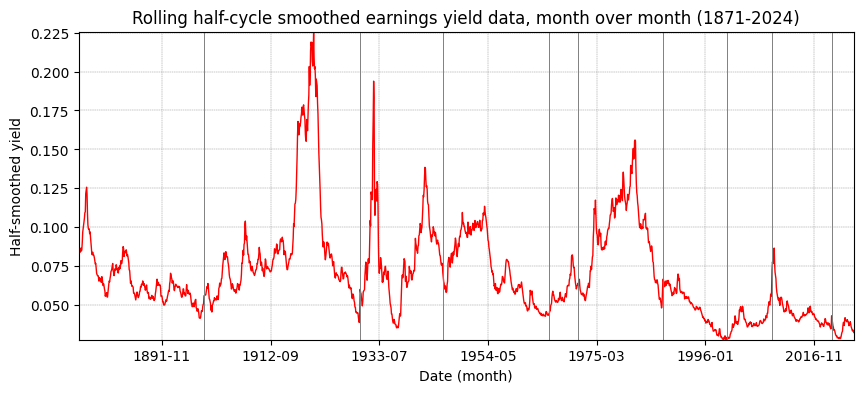

In [36]:
capes_df.plot(x="date", y="half_caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling half-cycle smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Half-smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.3. Cyclically-adjusted-price-to-earnings ratio (Shiller CAPE)

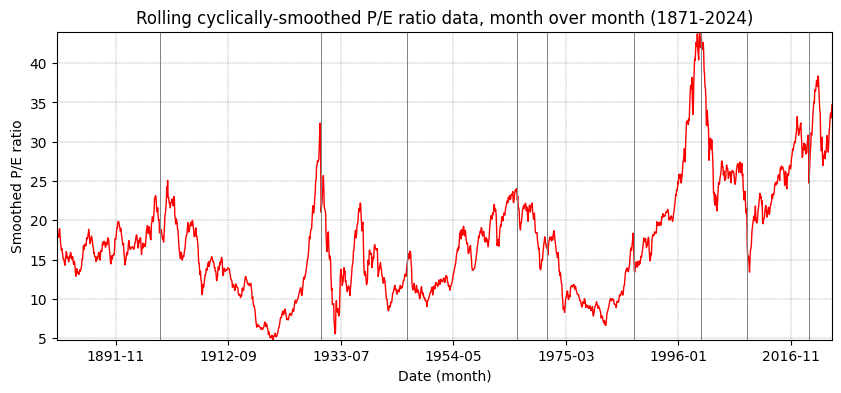

In [37]:
capes_df.plot(x="date", y="cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling cyclically-smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.4. Cyclically-adjusted-earnings-yield (Shiller CAEY)

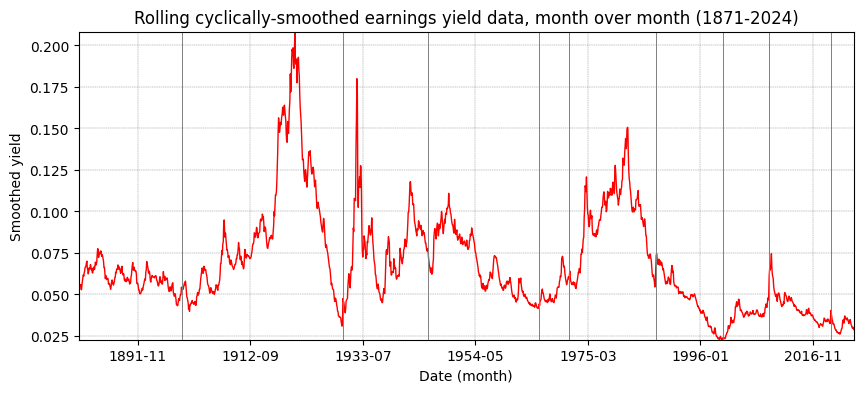

In [38]:
capes_df.plot(x="date", y="caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling cyclically-smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.5. Payout-adjusted cyclically-adjusted-price-to-earnings ratio (Morningstar CAPE)

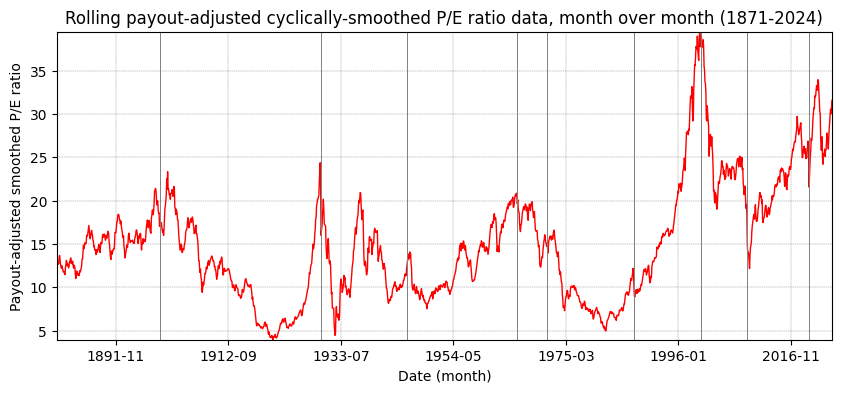

In [39]:
capes_df.plot(x="date", y="p-cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling payout-adjusted cyclically-smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout-adjusted smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.6. Payout-adjusted cyclically-adjusted-earnings-yield (Morningstar CAEY)

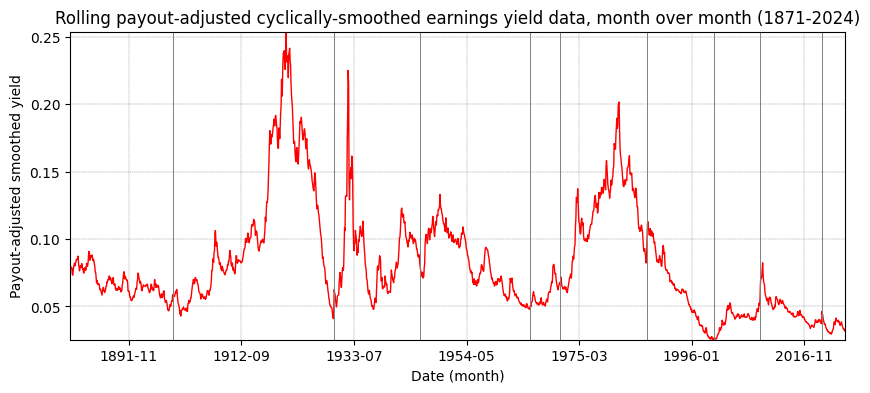

In [40]:
capes_df.plot(x="date", y="p-caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling payout-adjusted cyclically-smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout-adjusted smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 7.3. Various comparison charts

##### 7.3.1. Comparing P/E ratio to P/D ratio

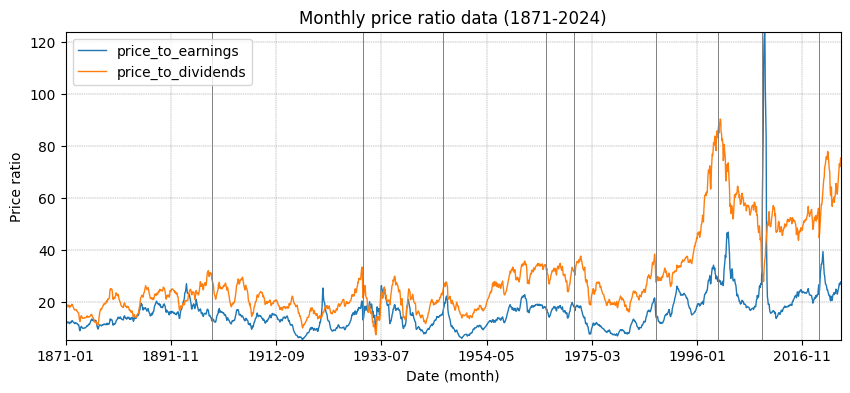

In [41]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, PD_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Price ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.2. Comparing earnings yield to dividends yield

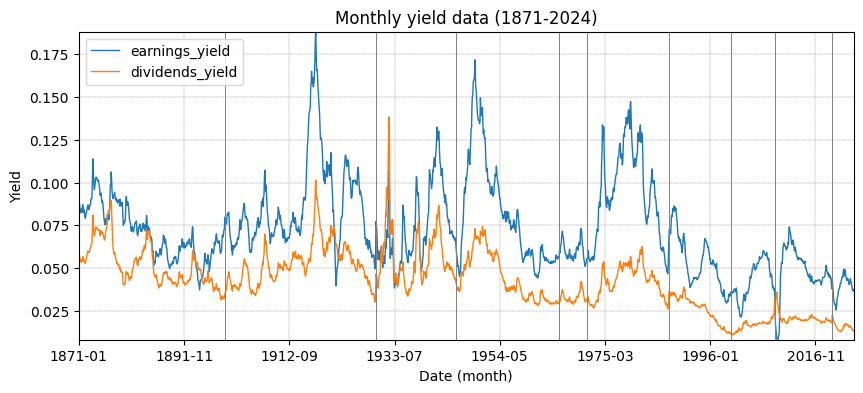

In [42]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, DY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.3. Comparing dividend cover to dividend payout ratio

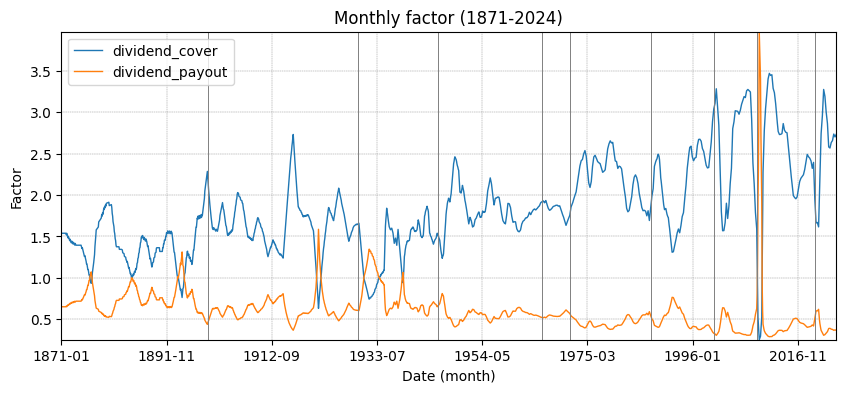

In [43]:
ratios_df.plot(x=DATE_COL, y=[DC_COL, DP_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly factor (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Factor")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.4. Comparing P/E ratio to H-CAPE

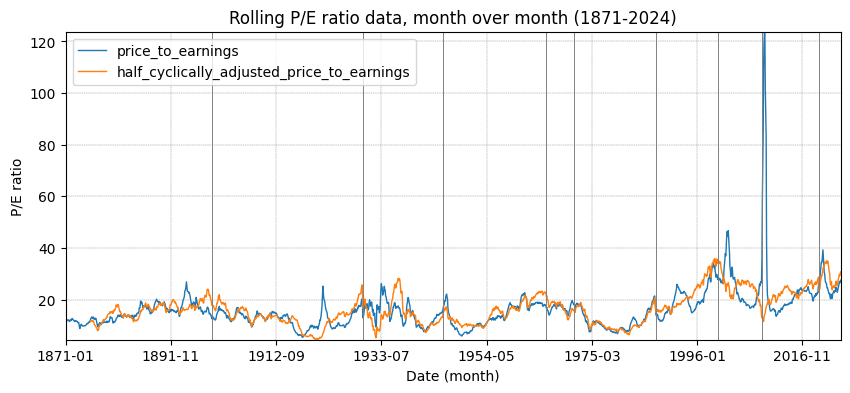

In [44]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, H_CAPE_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.5. Comparing earnings yield to H-CAEY

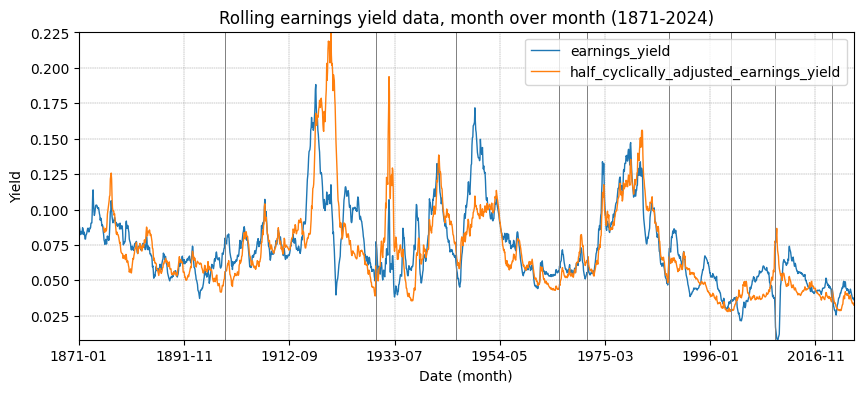

In [45]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, H_CAEY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.6. Comparing P/E ratio to CAPE

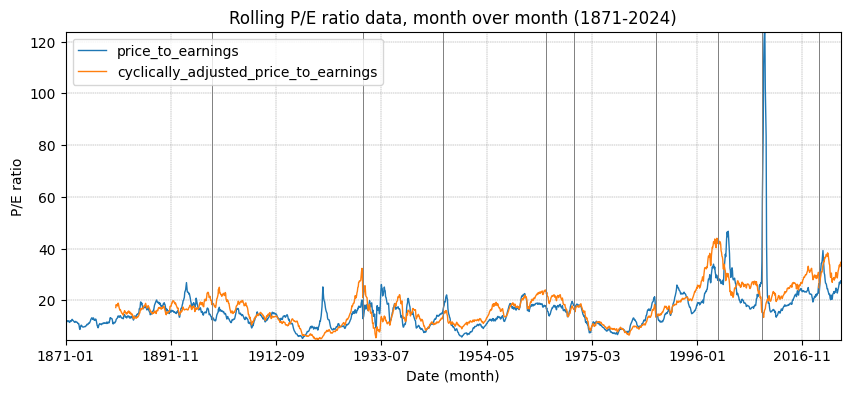

In [46]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, CAPE_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.7. Comparing earnings yield to CAEY

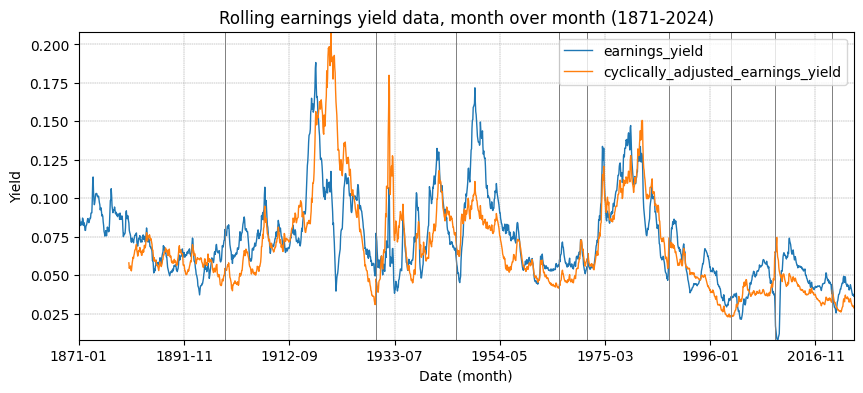

In [47]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, CAEY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.8. Comparing H-CAPE to CAPE

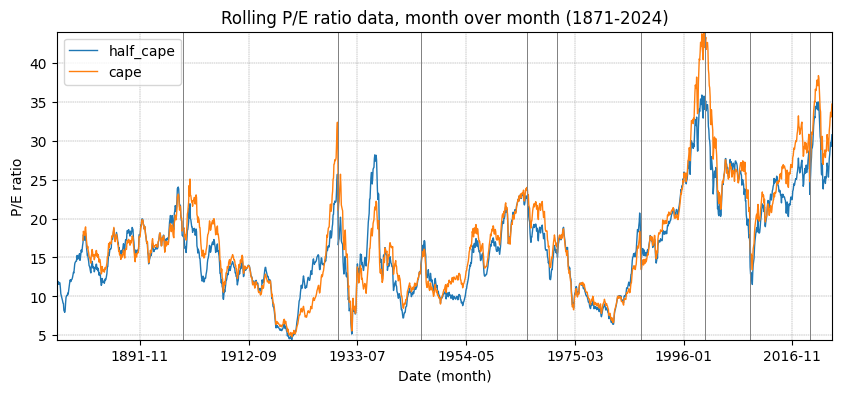

In [48]:
capes_df.plot(x=DATE_COL, y=["half_cape", "cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.9. Comparing H-CAEY to CAEY

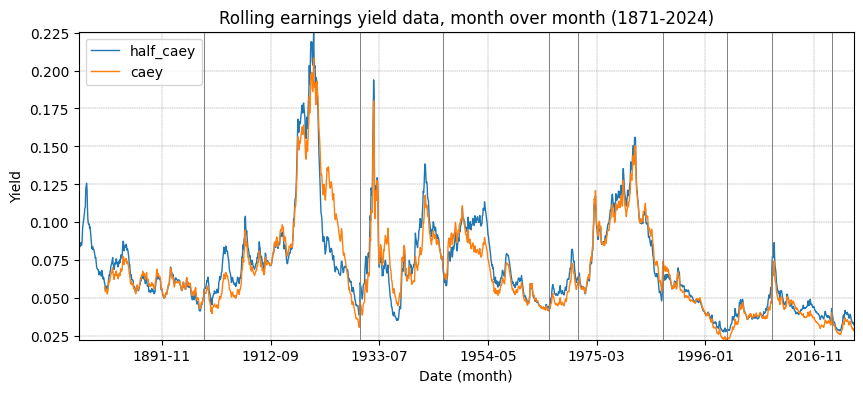

In [49]:
capes_df.plot(x=DATE_COL, y=["half_caey", "caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.10. Comparing CAPE to P-CAPE

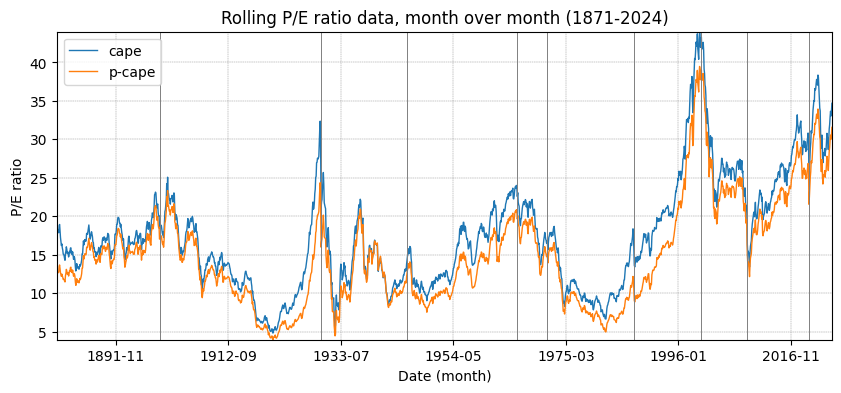

In [50]:
capes_df.plot(x=DATE_COL, y=["cape", "p-cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.11. Comparing CAEY to P-CAEY

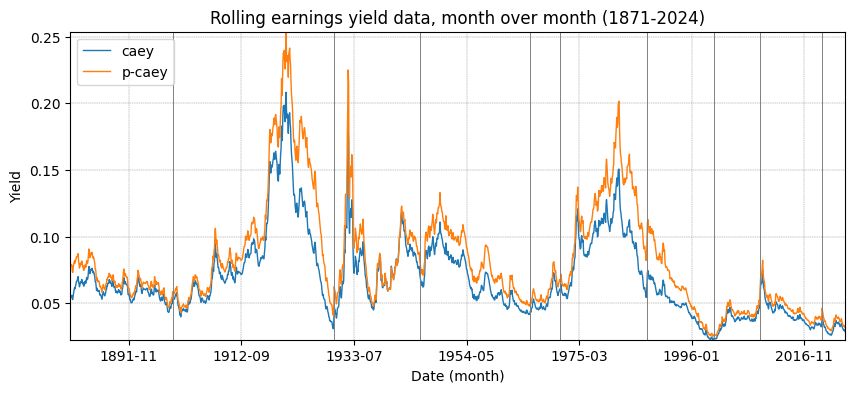

In [51]:
capes_df.plot(x=DATE_COL, y=["caey", "p-caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.12. Full comparison of all P/E ratios

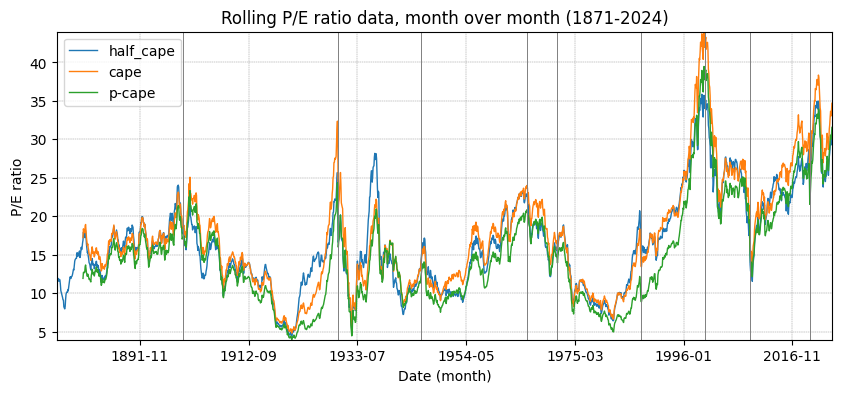

In [52]:
capes_df.plot(x=DATE_COL, y=["half_cape", "cape", "p-cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.13. Full comparison of all earnings yield ratios

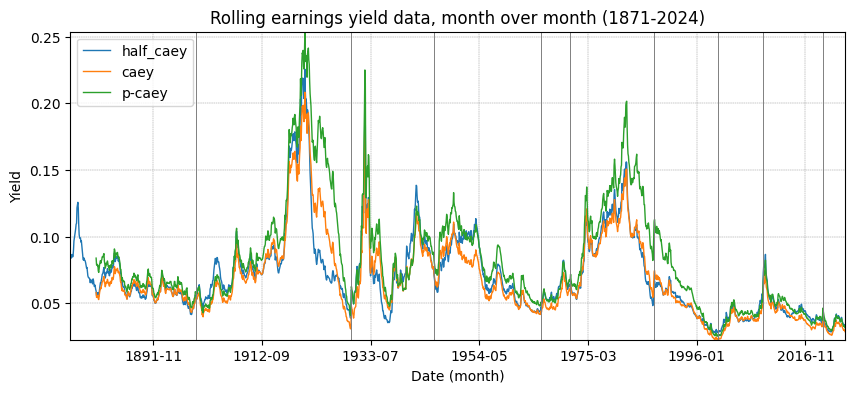

In [53]:
capes_df.plot(x=DATE_COL, y=["half_caey", "caey", "p-caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()